In [1]:
import pandas as pd

In [2]:
#fetch data
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<Axes: xlabel='count', ylabel='Sex'>

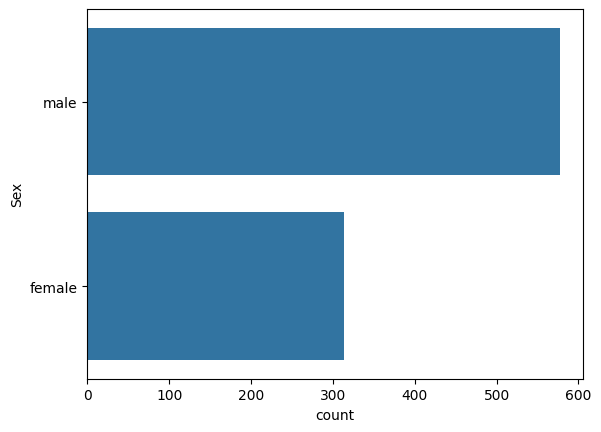

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data['Sex'])

<Axes: xlabel='Survived', ylabel='count'>

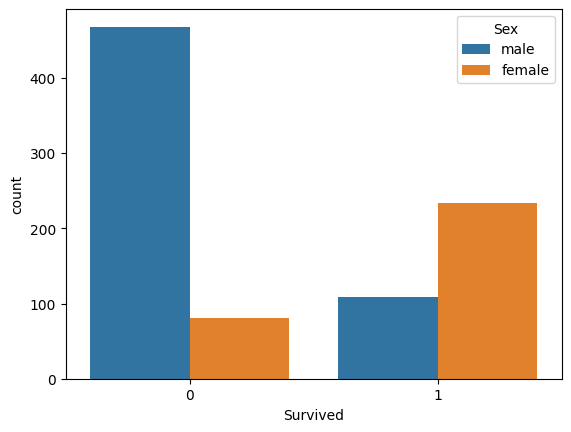

In [7]:
sns.countplot(data, x='Survived', hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

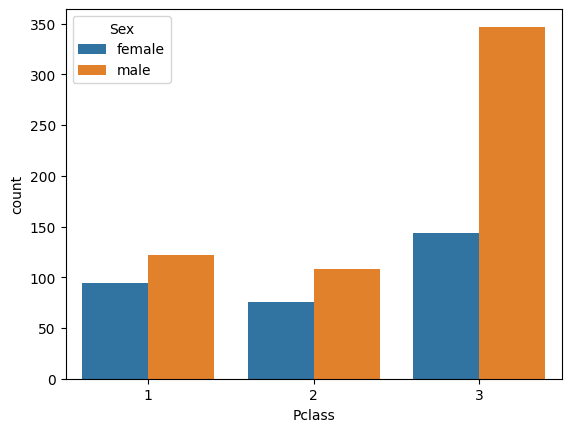

In [8]:
sns.countplot(data, x='Pclass', hue='Sex')

<Axes: xlabel='Pclass', ylabel='Survived'>

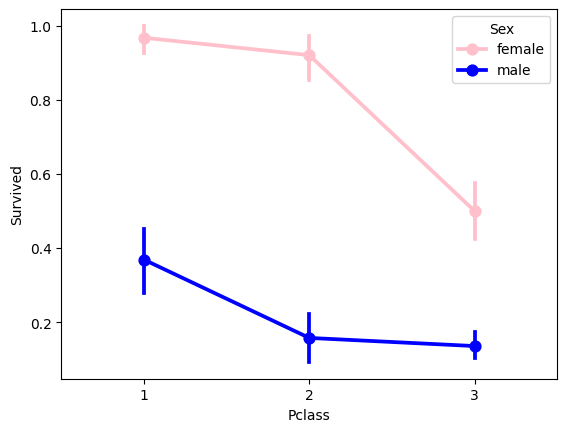

In [9]:
sns.pointplot(data, x='Pclass', y='Survived', hue='Sex', palette={'male':'blue', 'female':'pink'})

In [10]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import re
pattern = r'([A-Z])'
#data['C'] = data['Cabin'].dropna()
def fetch_cab(text):
    match = re.findall(pattern, text)
    return match[0] if match else None
data['Cabin_secition'] = data['Cabin'].str.extract(pattern, expand=False)

<Axes: xlabel='Embarked', ylabel='Survived'>

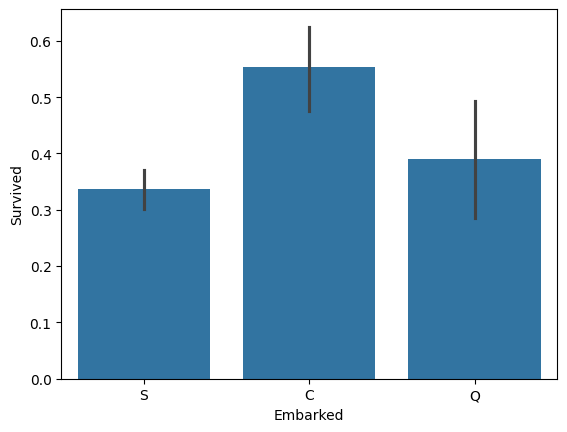

In [12]:
sns.barplot(data, x='Embarked', y='Survived')

In [14]:
def drop_cols(data, col_names):
    data.drop(col_names, inplace=True, axis=1)

In [15]:
drop_cols(data, col_names=['Name','PassengerId', 'Ticket', 'Cabin'])


<Axes: xlabel='Age', ylabel='Count'>

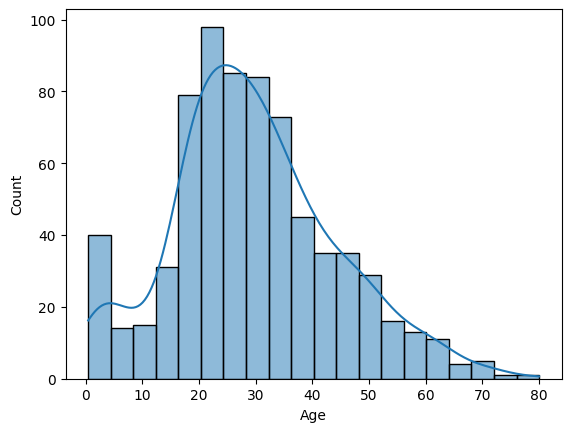

In [16]:
sns.histplot(data['Age'], kde=True)

<Axes: xlabel='Age', ylabel='Count'>

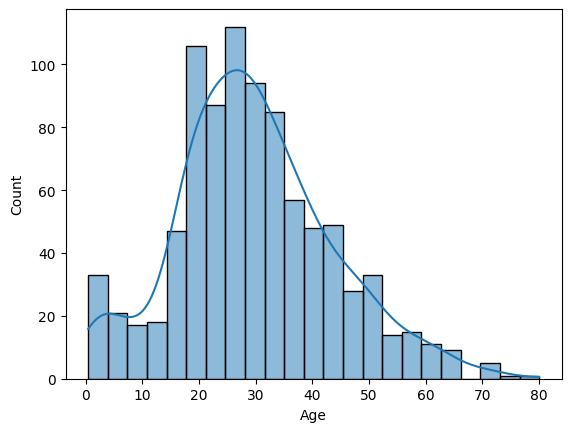

In [17]:
data['Age'] = data['Age'].interpolate(method='linear')
sns.histplot(data['Age'], kde=True)

In [18]:
data[data['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [19]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\anjal\AppData\Local\Temp\ipykernel_21788\4247733614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [20]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

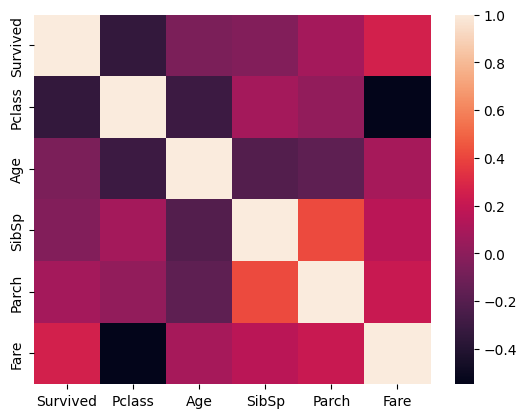

In [22]:
numerical_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.heatmap(data[numerical_columns].corr())

<Axes: xlabel='SibSp', ylabel='Parch'>

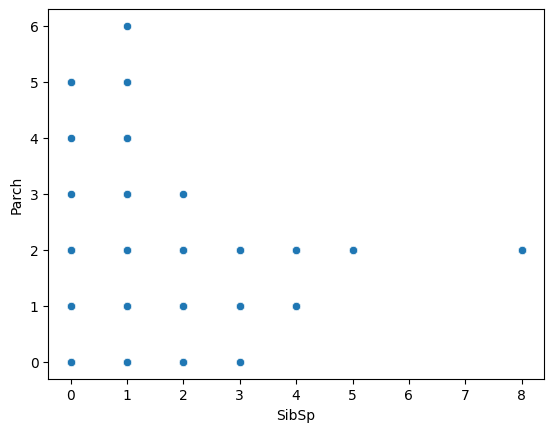

In [23]:
sns.scatterplot(data, x='SibSp', y='Parch')

In [24]:
# one hot encoding 
from sklearn.preprocessing import OneHotEncoder
def ohe(data, col_names):
    ohe = OneHotEncoder(sparse_output=False)
    ohe_result = ohe.fit_transform(data[col_names])

    enc_columns = ohe.get_feature_names_out(col_names)

    data = pd.concat([data, pd.DataFrame(ohe_result, columns=enc_columns, index=data.index)], axis=1)
    data.drop(col_names, inplace=True, axis=1)
    return data

In [25]:
data = ohe(data, col_names=['Sex','Embarked'])

In [26]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [27]:
#binning age
def handle_age(data):
    # handle missing values
    data['Age'] = data['Age'].interpolate(method='linear')
    #binning
    bins=[0, 5, 13, 20, 35, 60, 100]
    labels = ['baby', 'child', 'teenager', 'young adult', 'adult', 'senior']
    data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels)
    #one hot encoding
    data = ohe(data, col_names=['Age'])
    return data

In [28]:
data = handle_age(data)

In [29]:
y=data['Survived']
X=data[list(set(data.columns) - set(['Survived']))]

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X.columns

Index(['Pclass', 'Age_adult', 'Parch', 'SibSp', 'Age_young adult', 'Sex_male',
       'Age_baby', 'Age_senior', 'Age_child', 'Embarked_S', 'Age_teenager',
       'Embarked_C', 'Sex_female', 'Fare', 'Embarked_Q'],
      dtype='object')

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier()

rf_cls.fit(X_train, y_train)

y_pred_val = rf_cls.predict(X_val)

c:\Users\anjal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\anjal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Survived'>

c:\Users\anjal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\anjal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


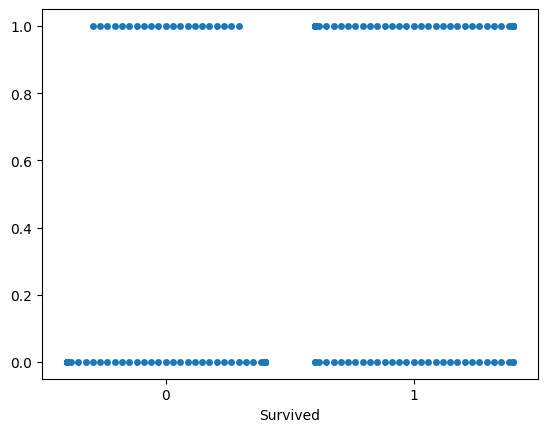

In [32]:
sns.swarmplot(x=y_val, y=y_pred_val)

In [33]:
from sklearn import metrics
def eval_metrics(y_test, y_pred):
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    precision=metrics.precision_score(y_test, y_pred)
    print(f"Precision: {precision}")
    recall=metrics.recall_score(y_test, y_pred)
    print(f"Recall: {recall}")

In [34]:
eval_metrics(y_val, y_pred_val)

Accuracy: 0.8059701492537313
Precision: 0.7920792079207921
Recall: 0.7207207207207207


In [35]:
test = pd.read_csv('test.csv')

In [44]:
test.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_adult,Age_baby,Age_child,Age_senior,Age_teenager,Age_young adult
0,3,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
drop_cols(test, col_names=['Name','PassengerId', 'Ticket', 'Cabin'])

In [38]:
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

C:\Users\anjal\AppData\Local\Temp\ipykernel_21788\1675548958.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)


In [39]:
test = ohe(test, col_names=['Sex','Embarked'])

In [40]:
test = handle_age(test)

In [45]:
features = X.columns

In [47]:
test.isna().sum()

Pclass             0
SibSp              0
Parch              0
Fare               1
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Age_adult          0
Age_baby           0
Age_child          0
Age_senior         0
Age_teenager       0
Age_young adult    0
dtype: int64

In [49]:
test.dropna(inplace=True)

In [56]:
y_pred_test = rf_cls.predict_proba(test[features])[:, 1]

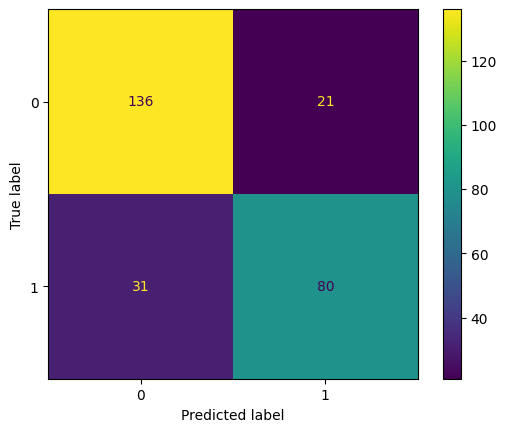

In [57]:
cm = metrics.confusion_matrix(y_val, y_pred_val, labels=rf_cls.classes_)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()


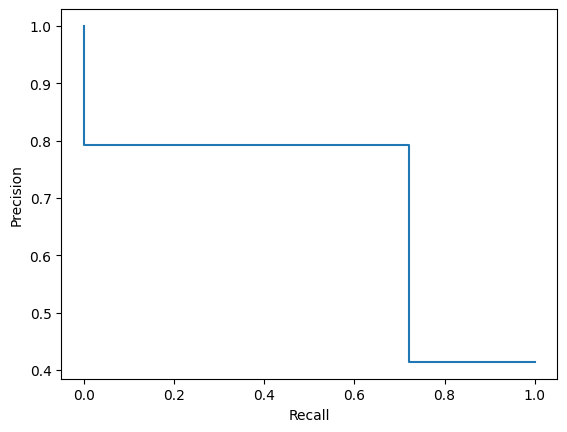

In [58]:
precision, recall, _ = metrics.precision_recall_curve(y_val, y_pred_val)
disp = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()